# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [4]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
##!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('Traffic Data.csv')
 ##parse_dates=['date_time'], index_col=['date_time'])
df

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00
...,...,...,...,...,...,...,...,...
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00


In [7]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [8]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
19995,2723.0,296.42,0.0,0.0,40,Clouds,scattered clouds,2018-06-06 21:00:00
19996,5895.0,285.58,0.0,0.0,40,Clouds,scattered clouds,2017-10-25 15:00:00
19997,1132.0,275.30,0.0,0.0,1,Clear,sky is clear,2018-03-28 23:00:00
19998,5525.0,260.94,0.0,0.0,75,Clouds,broken clouds,2018-02-12 15:00:00
19999,5042.0,301.65,0.0,0.0,40,Clouds,scattered clouds,2018-05-31 18:00:00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19980 non-null  float64
 1   temp                 20000 non-null  float64
 2   rain_1h              20000 non-null  float64
 3   snow_1h              20000 non-null  float64
 4   clouds_all           20000 non-null  int64  
 5   weather_main         20000 non-null  object 
 6   weather_description  20000 non-null  object 
 7   date_time            20000 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.2+ MB


In [10]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
count,19980.000000,20000.000000,20000.000000,20000.0,20000.000000
mean,3278.186887,281.162680,0.048396,0.0,49.384600
std,1977.171357,12.661288,0.398007,0.0,39.647341
min,113.000000,243.390000,0.000000,0.0,0.000000
25%,1228.750000,271.950000,0.000000,0.0,1.000000
50%,3430.000000,281.825000,0.000000,0.0,75.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000


## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

<Axes: >

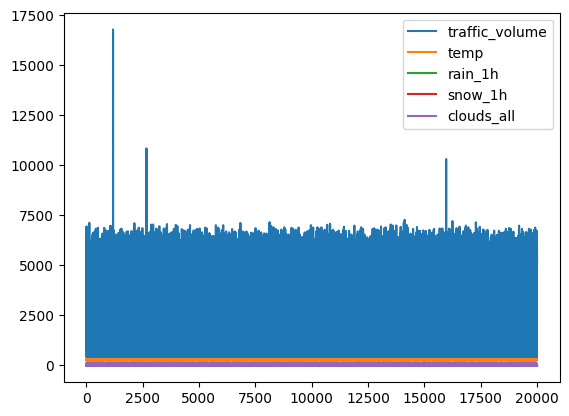

In [11]:
df.plot()

In [12]:
df.isna().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


In [13]:
df['traffic_volume'] = df['traffic_volume'].fillna(0)


In [14]:
df.isna().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


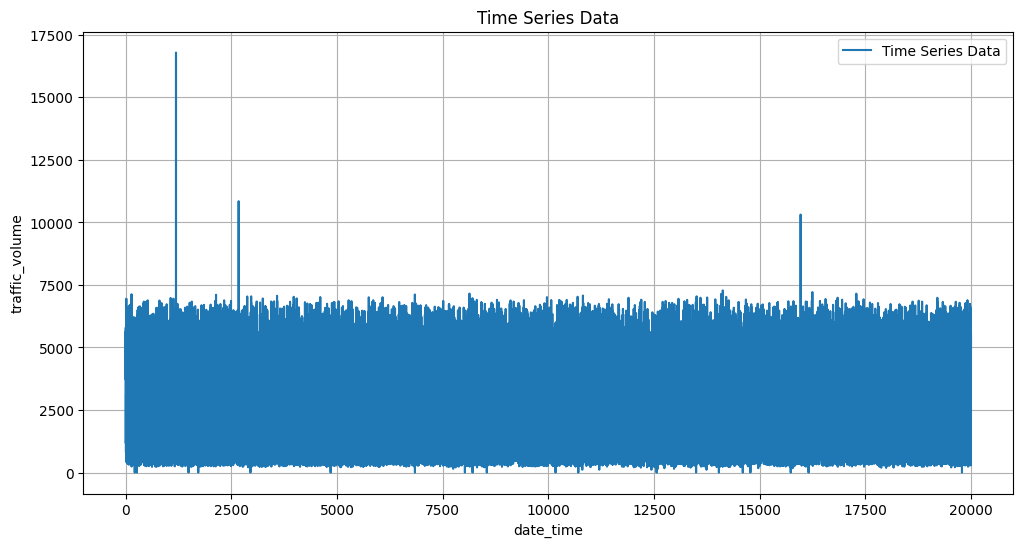

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['traffic_volume'], label='Time Series Data')
plt.title('Time Series Data')
plt.xlabel('date_time')
plt.ylabel('traffic_volume')
plt.legend()
plt.grid(True)
plt.show()

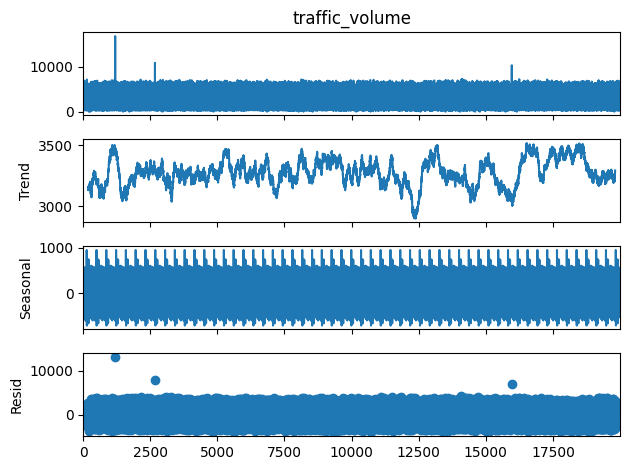

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming the data is daily and you want to decompose it into a yearly cycle:
result = seasonal_decompose(df['traffic_volume'], model='additive', period=365)
result.plot()
plt.show()

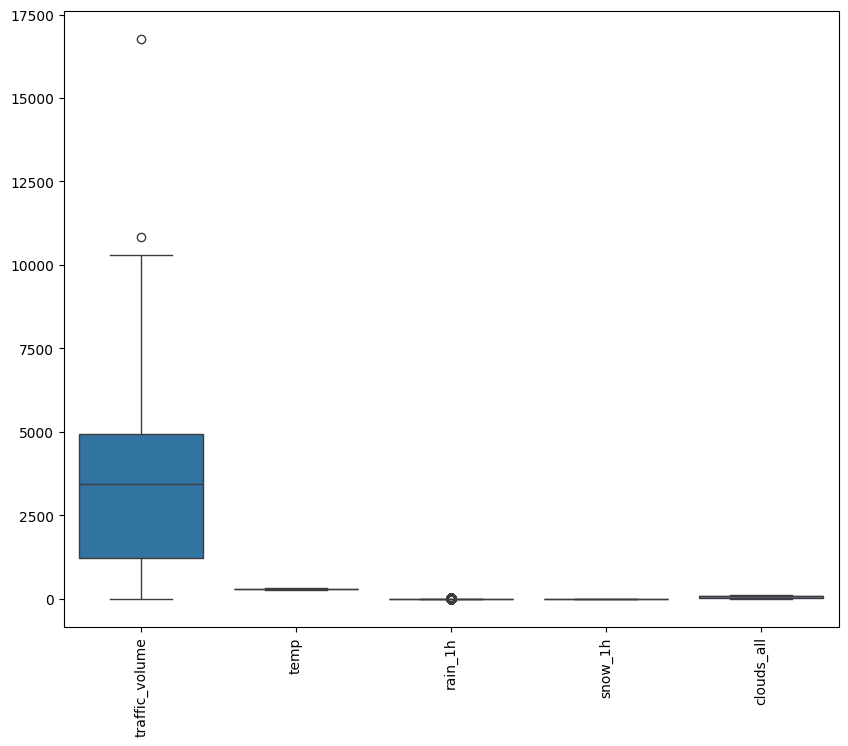

In [17]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [18]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'traffic_volume')

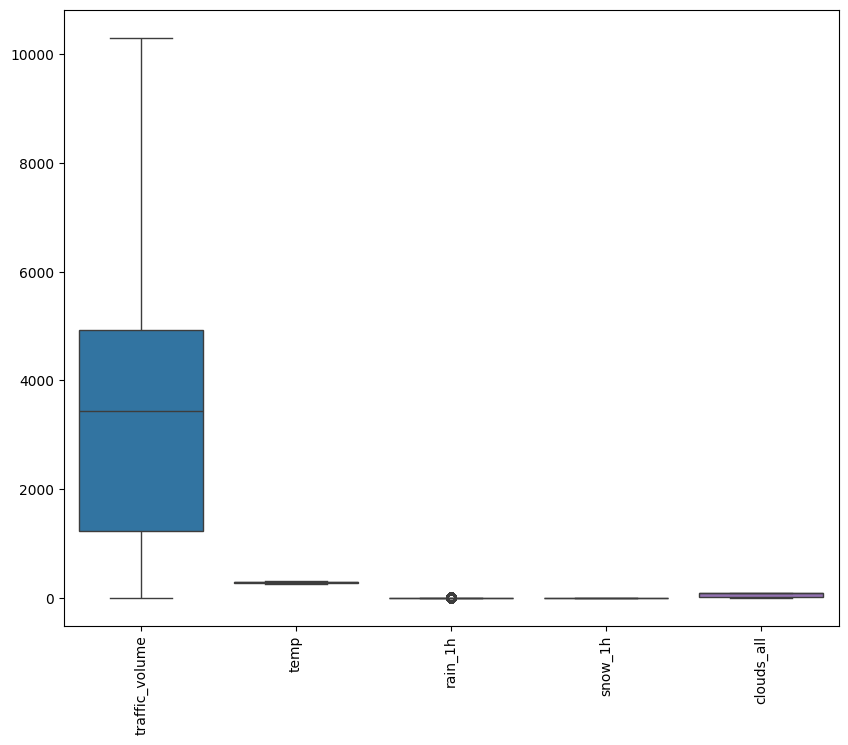

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='traffic_volume'>

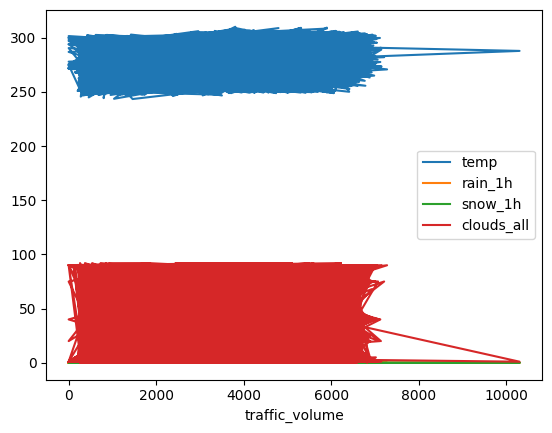

In [20]:
df.plot(x='traffic_volume')

<Axes: xlabel='date_time', ylabel='traffic_volume'>

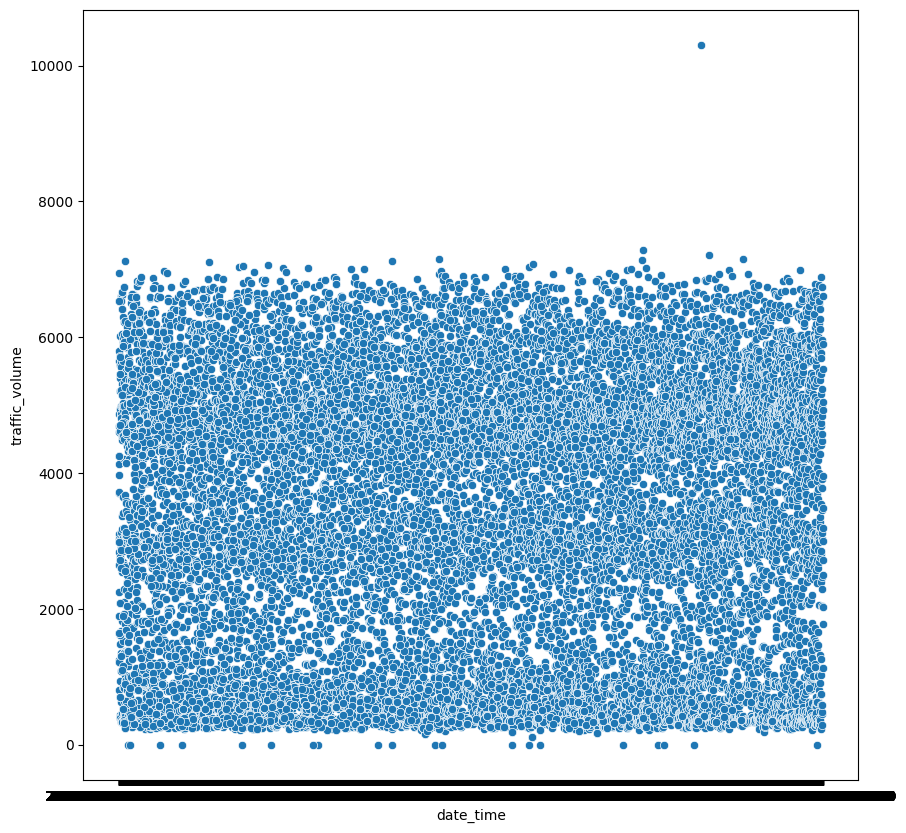

In [21]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 'date_time', y = 'traffic_volume', data = df)

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [22]:
df.sort_index(inplace=True)

In [23]:
df['date_time'] = pd.to_datetime(df['date_time'])

df = df.sort_values(by='date_time')

<ipython-input-23-8fe1efbdac2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_time'] = pd.to_datetime(df['date_time'])


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [24]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)

df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00,NaN
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00,4872.0
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00,4872.0
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00,4872.0
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00,5074.0


In [25]:
df['traffic_volume_diff'] = df['traffic_volume'].diff()
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,prev_traffic_volume,traffic_volume_diff
14496,4872.0,274.08,0.0,0.0,90,Mist,mist,2016-11-18 15:00:00,NaN,NaN
4628,4872.0,274.08,0.0,0.0,90,Fog,fog,2016-11-18 15:00:00,4872.0,0.0
7745,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,2016-11-18 15:00:00,4872.0,0.0
3867,5074.0,273.84,0.0,0.0,90,Mist,mist,2016-11-18 16:00:00,4872.0,202.0
8867,5074.0,273.84,0.0,0.0,90,Fog,fog,2016-11-18 16:00:00,5074.0,0.0


In [32]:
df['year'] = pd.DatetimeIndex(df['date_time']).year
df['month'] = pd.DatetimeIndex(df['date_time']).month
df['day'] = pd.DatetimeIndex(df['date_time']).day
df['day_of_year'] = pd.DatetimeIndex(df['date_time']).dayofyear
df['week_of_year'] = df['date_time'].dt.isocalendar().week
df['quarter'] = pd.DatetimeIndex(df['date_time']).quarter
df['season'] = df['month'] % 12 // 3 + 1
df['date'] = df['date_time'].dt.date

df[['date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()


,date,year,month,day,day_of_year,week_of_year,quarter,season
14496,2016-11-18,2016,11,18,323,46,4,4
4628,2016-11-18,2016,11,18,323,46,4,4
7745,2016-11-18,2016,11,18,323,46,4,4
3867,2016-11-18,2016,11,18,323,46,4,4
8867,2016-11-18,2016,11,18,323,46,4,4


## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [33]:
X=df.drop('traffic_volume', axis=1)
y=df['traffic_volume']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

In [35]:
numeric_columns = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'prev_traffic_volume', 'traffic_volume_diff']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


ValueError: could not convert string to float: 'Clouds'

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [38]:
from tensorflow.keras.utils import timeseries_dataset_from_array

window_size = 60

train_Xy = timeseries_dataset_from_array(train_pre, targets=train_pre[window_size:], sequence_length=window_size)
val_Xy = timeseries_dataset_from_array(val_pre, targets=val_pre[window_size:], sequence_length=window_size)
test_Xy = timeseries_dataset_from_array(test_pre, targets=test_pre[window_size:], sequence_length=window_size)

NameError: name 'train_pre' is not defined

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [39]:
df = pd.get_dummies(df, columns=list(set(df.columns) - set(df._get_numeric_data().columns)))

In [40]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(df)

NameError: name 'MinMaxScaler' is not defined

In [41]:
train_size = int(len(df)*.67)
test_size = len(df)- train_size

train,test = df.iloc[0:train_size,:], df.iloc[train_size:len(df),:]
print(len(df),len(train),len(test))

19998 13398 6600


In [42]:
def create_dataset(dataset, look_back):

    dataX,dataY = [],[]

    for i in range(len(dataset)-look_back-1):

        dataX.append(dataset[i:i+look_back,0])
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX), np.array(dataY)

In [43]:
X_train = np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [44]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

LT = Sequential()

LT.add(LSTM(units=100, activation='tanh', return_sequences=True,input_shape=(X_train.shape[1], 1)))
LT.add(Dropout(0.2))

LT.add(LSTM(units=100, activation='tanh', return_sequences=True))
LT.add(Dropout(0.2))

LT.add(LSTM(units=100, activation='tanh'))
LT.add(Dropout(0.2))

LT.add(Dense(units=1))
LT.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 100)              │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 1, 100)              │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,701 (787.89 KB)

 Trainable params: 201,701 (787.89 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
LT.compile(optimizer='adam', loss='mean_squared_error',metrics=['mae'])

In [46]:
univariate_df = df['traffic_volume'].copy()

train = univariate_df.iloc[:train_size]
test = univariate_df.iloc[train_size:]

X_train,y_train = pd.DataFrame(train.iloc[:-1]),pd.DataFrame(train.iloc[1:])
X_test, y_test = pd.DataFrame(test.iloc[:-1]), pd.DataFrame(test.iloc[1:])

X_train = np.reshape(X_train.values, (X_train.shape[0], 1, 1))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, 1))

model = Sequential()

model.add(LSTM(4,input_shape = (1,1)))
model.add(Dense(1))

history = model.compile(optimizer = 'adam', loss = 'mse')
history = model.fit(X_train,y_train,epochs = 20,verbose = 2, batch_size = 10, validation_data = (X_test,y_test))

Epoch 1/20
1340/1340 - 7s - 5ms/step - loss: 14553557.0000 - val_loss: 14734851.0000
Epoch 2/20
1340/1340 - 5s - 4ms/step - loss: 14534308.0000 - val_loss: 14717543.0000
Epoch 3/20
1340/1340 - 7s - 5ms/step - loss: 14518367.0000 - val_loss: 14702065.0000
Epoch 4/20
1340/1340 - 9s - 7ms/step - loss: 14503104.0000 - val_loss: 14686832.0000
Epoch 5/20
1340/1340 - 4s - 3ms/step - loss: 14487971.0000 - val_loss: 14671606.0000
Epoch 6/20
1340/1340 - 3s - 2ms/step - loss: 14472857.0000 - val_loss: 14656471.0000
Epoch 7/20
1340/1340 - 5s - 3ms/step - loss: 14457778.0000 - val_loss: 14641324.0000
Epoch 8/20
1340/1340 - 3s - 2ms/step - loss: 14442742.0000 - val_loss: 14626184.0000
Epoch 9/20
1340/1340 - 3s - 2ms/step - loss: 14427639.0000 - val_loss: 14611043.0000
Epoch 10/20
1340/1340 - 6s - 4ms/step - loss: 14412617.0000 - val_loss: 14595949.0000
Epoch 11/20
1340/1340 - 3s - 3ms/step - loss: 14397554.0000 - val_loss: 14580798.0000
Epoch 12/20
1340/1340 - 4s - 3ms/step - loss: 14382509.0000 - v

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [47]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [48]:
df.head()
df.dtypes

,0
traffic_volume,float64
temp,float64
rain_1h,float64
snow_1h,float64
clouds_all,int64
...,...
date_time_2018-09-30 19:00:00,bool
date_time_2018-09-30 20:00:00,bool
date_time_2018-09-30 21:00:00,bool
date_time_2018-09-30 22:00:00,bool


In [49]:
df = df.fillna(0)


In [50]:
import numpy as np

np_array = df.to_numpy()


In [51]:
import tensorflow as tf

tensor = tf.convert_to_tensor(np_array, dtype=tf.float32)

In [57]:
import math
from sklearn.metrics import mean_squared_error

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
scaler.fit(X_train.reshape(-1, 1))

train_predict = scaler.inverse_transform(train_predict)
y_train_reshaped = scaler.inverse_transform(y_train.values.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test_reshaped = scaler.inverse_transform(y_test.values.reshape(-1, 1))

# Now you can use mean_squared_error
math.sqrt(mean_squared_error(y_train_reshaped[:, 0],train_predict[:,0]))
math.sqrt(mean_squared_error(y_test_reshaped[:, 0],test_predict[:,0]))

419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


7481202.157037731

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [54]:
test_predict.shape

(6599, 1)

KeyError: 'date_time'

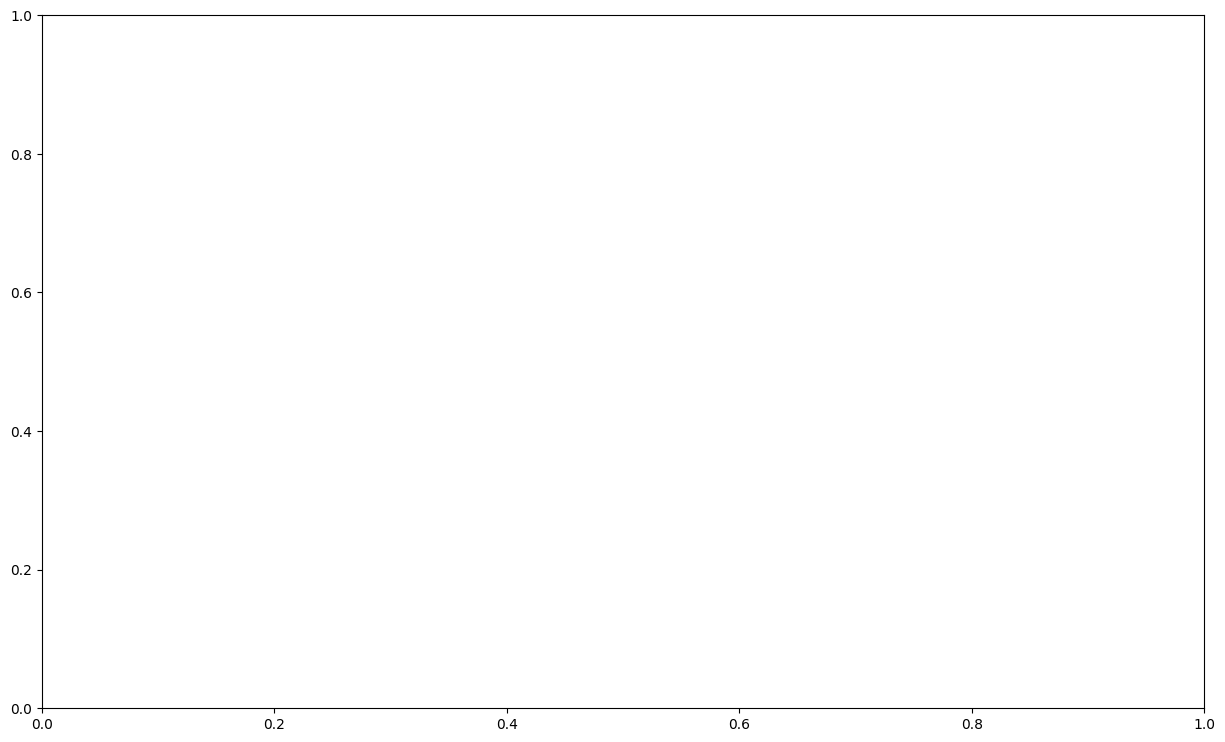

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

f, ax = plt.subplots(figsize = (15,9))
sns.lineplot(x = df["date_time"], y=df["traffic_volume"], ax = ax)
sns.lineplot(x = df["date_time"].tail(145), y = test_predict[:,0], ax = ax)
plt.show()


### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [56]:
df['traffic_volume_first_diff'] = df['traffic_volume'] - df['traffic_volume'].shift(1)
df['traffic_volume_first_diff'].iloc[0] = 0.0

<ipython-input-56-32a92c7c171e>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['traffic_volume_first_diff'] = df['traffic_volume'] - df['traffic_volume'].shift(1)
<ipython-input-56-32a92c7c171e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_volume_first_diff'].iloc[0] = 0.0


### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

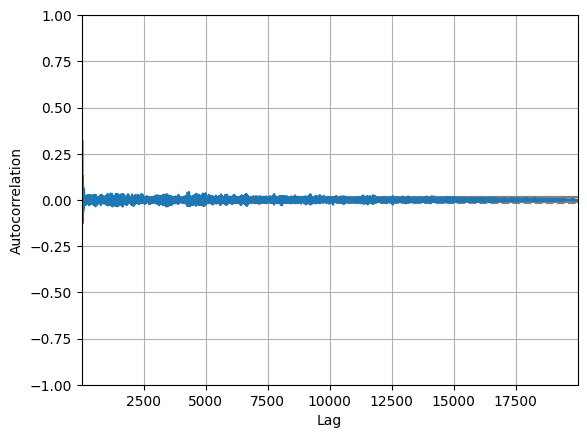

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['traffic_volume_first_diff'])
plt.show()

In [61]:
!pip install statsmodels
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math


train_size = int(len(df) * 0.8)
y_train, y_valid = df['traffic_volume'][:train_size], df['traffic_volume'][train_size:]

A_model = ARIMA(y_train, order = (4,1,12))
model_fit = A_model.fit()

pred = model_fit.forecast(steps=len(y_valid))

mse_arima = math.sqrt(mean_squared_error(y_valid,pred[0])) # Access the predictions from the tuple returned by forecast
print(mse_arima)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  

KeyError: 0

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
MAE: 3237.406084228021
MSE: 14445321.160288503
RMSE: 3800.700088179611
MAPE: inf%


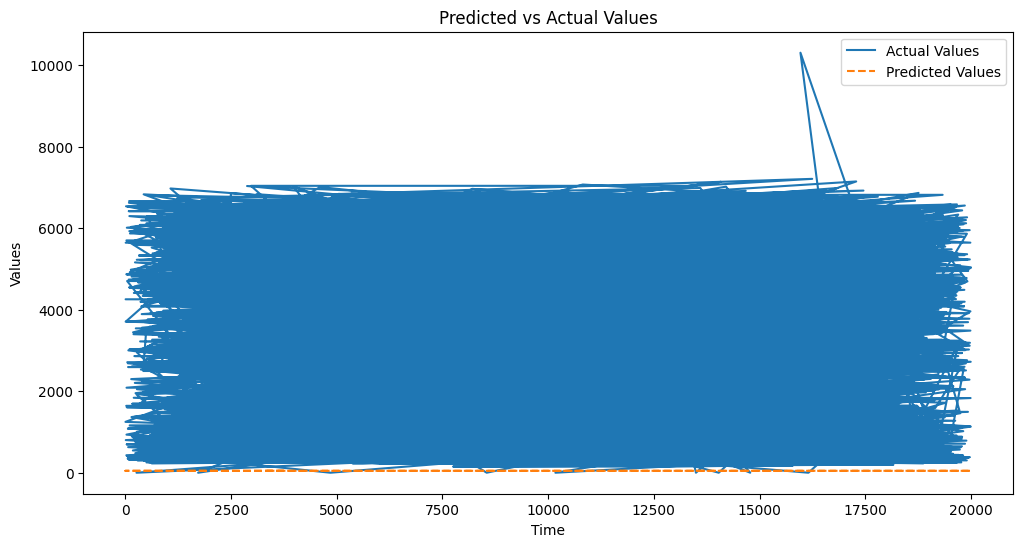

In [63]:
import matplotlib.pyplot as plt

# Plot predicted vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Values')
plt.plot(y_test.index, y_pred, label='Predicted Values', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()


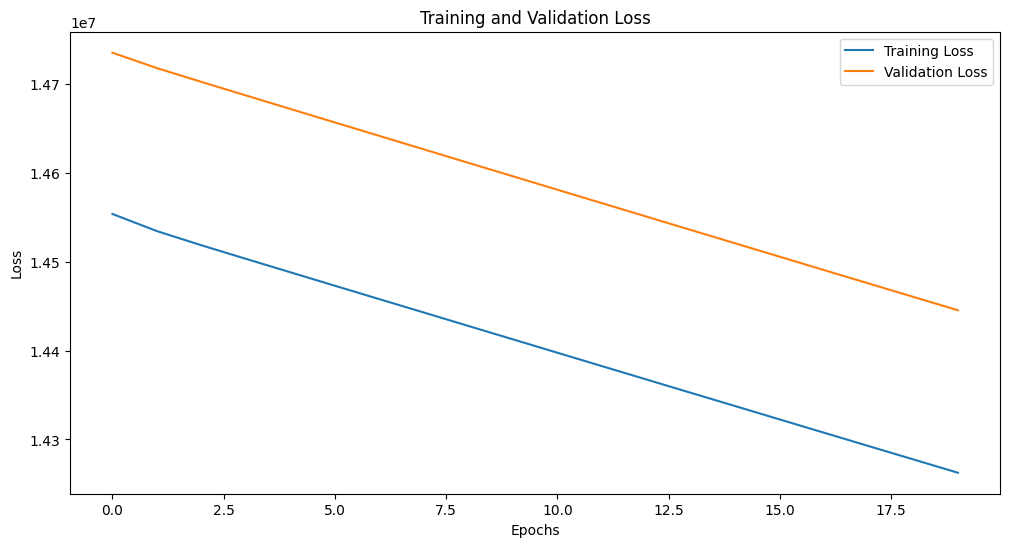

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

1- I chose to handle missing values in my data preprocessing because incomplete data can distort model training and lead to biased results.


2- I extracted several temporal features from the date_time column, including year, month, day, day of year, week of year, quarter, and season, to capture various time-related patterns and trends. Additionally, I created new features to better understand traffic volume dynamics


3- I used a combination of LSTM and ARIMA models for time series forecasting. The LSTM model was chosen for its ability to capture long-term dependencies and sequential patterns and ARIMA was employed to handle time series characteristics like trends and seasonality, focusing on autoregression, differencing, and moving averages  


4- I chose a batch size of 10 to allow the model to update weights frequently and improve generalization, while 20 epochs provided enough training without risking overfitting. The Adam optimizer was selected for its adaptive learning rate, which aids in faster convergence and better performance. Through experimentation, I found that smaller batch sizes improved model accuracy, increasing epochs beyond 20 led to overfitting, and Adam generally provided the best results compared to other optimizers. The dataset was split into 67% for training and 33% for testing


5- I selected Mean Squared Error (MSE) as the loss function because it effectively minimizes the average squared difference between predictions and actual values


7- use early stopping, regularization, and dropout to simplify the model and prevent it from learning noise. For underfitting, increase model complexity,

8- ensemble methods can combine the strengths of multiple models for improved accuracy. These steps can help refine the model and achieve better forecasting results.
